In [44]:
import pyautogui
import IPython.display as ipd
from pynput import keyboard
from pynput.mouse import Button, Controller
import time
from db import *
import matplotlib.pyplot as plt
%matplotlib inline

# DB 확인

In [2]:
mouse = Controller()

In [3]:
def get_xy():
    print(mouse.position)
    return mouse.position

# 라디오 버튼 여섯개 위에 마우스를 한번씩 올려두고 아래 코드를 실행

In [4]:
x1, y1 = get_xy()

(220, 787)


In [5]:
x2, y2 = get_xy()

(219, 819)


In [6]:
x3, y3 = get_xy()

(221, 848)


In [7]:
x4, y4 = get_xy()

(221, 879)


In [8]:
x5, y5 = get_xy()

(219, 912)


In [9]:
x6, y6 = get_xy()

(221, 942)


In [10]:
xs, ys = get_xy()

(215, 991)


In [32]:
def move_and_click(x, y):
    pyautogui.moveTo(x, y, .01)
    mouse.click(Button.left, 1)

In [45]:
import sys
del sys.modules['db']
from db import *

In [46]:
cnt_triplet = []
cnt_pospair = []
cnt_negpair = []

In [61]:
def on_press(key):
    global cnt_triplet, cnt_pospair, cnt_negpair
    _x, _y = mouse.position
    global count
    try:
        print(key.char)
        if key.char == keyboard.Key.esc:
            print('See you later!')
        elif key.char == '1':
            move_and_click(x1,y1)
            move_and_click(xs,ys)
            count += 1
        elif key.char == '2':
            move_and_click(x2,y2)
            move_and_click(xs,ys)
            count += 1
        elif key.char == '3':
            move_and_click(x3,y3)
            move_and_click(xs,ys)
            count += 1
        elif key.char == '4':
            move_and_click(x4,y4)
            move_and_click(xs,ys)
            count += 1
        elif key.char == '5':
            move_and_click(x5,y5)
            move_and_click(xs,ys)
        elif key.char == '6':
            move_and_click(x6,y6)
            move_and_click(xs,ys)
            
        move_and_click(_x, _y)
        ipd.clear_output(wait=True)
        print('라벨링', count)
#         count_image()
        cnt_triplet.append(count_triplet())
        cnt_pospair.append(count_pospair())
        cnt_negpair.append(count_negpair())
        
        plt.figure(figsize=(10,1),dpi=100)
        plt.plot(cnt_triplet, label='triplet', color='green')
        plt.legend()
        plt.show()
        plt.figure(figsize=(10,1),dpi=100)
        plt.plot(cnt_pospair, label='pos pair', color='blue')
        plt.legend()
        plt.show()
        plt.figure(figsize=(10,1),dpi=100)
        plt.plot(cnt_negpair, label='neg pair', color='red')
        plt.legend()
        plt.show()

    except AttributeError:
        pass
def on_release(key):
    if key == keyboard.Key.esc:
        print('See you later!')
        # Stop listener
        return False

# 오늘 처음 라벨링이라면 아래 카운트 0으로 두고 시작

In [15]:
count = 100

# 아래 코드를 실행
* 라디오 버튼 번호에 해당하는 키보드 숫자 (qwerty 위에 있는거) 누르면 자동으로 서브밋과 카운트 해줌
* 'ESC' 누르면 종료

라벨링 224
# of triplet: 3904
# of positive pair: 702
# of negative pair: 3347


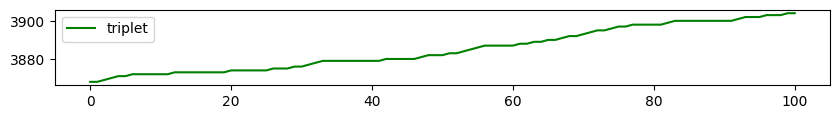

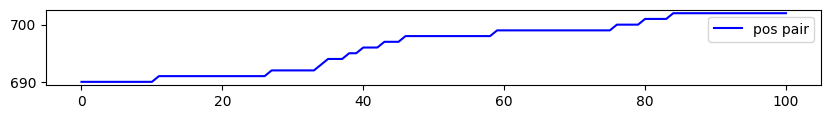

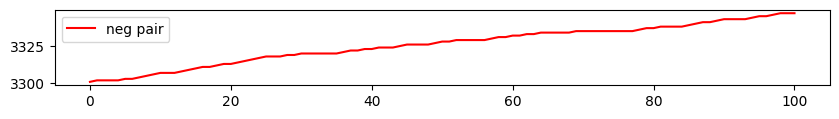

See you later!


In [63]:
listener = keyboard.Listener(
    on_press=on_press,
    on_release=on_release)
listener.start()